# DATA422: Data Wrangling Project (R part) - Blake List
The following code is used to read in, wrangle and visualize the suicide rates per 100,000 population for males and females and the world happiness report statistics by country. This data is used to create a map plot of the world suicide rates by gender for the year 2016 and an animated bar plot of total suicide rates by country for the years 1951-2015.

In [2]:
# Load necessary imports for reading in, manipulating, and visualizing data.
library(tidyverse)
library(readr)
library(readxl)
library(data.table)
library(lubridate)
library(ggplot2)
library(ggpubr)
library(grid)
library(gridExtra)
library(ggmap)
library(maptools)
library(maps)
library(gganimate)
library(transformr)
# devtools::install_github('thomasp85/gganimate')

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date

Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':



In [3]:
# Load in the suicide rate estimates per 100,000 population by country and convert it to a tibble.
suicide_estimates <- read_csv("suicide_rate_estimates_crude_who.csv") %>%
  tbl_df()

Parsed with column specification:
cols(
  Country = col_character(),
  Sex = col_character(),
  `Crude suicide rates (per 100 000 population) 2016` = col_double(),
  `Crude suicide rates (per 100 000 population) 2015` = col_double(),
  `Crude suicide rates (per 100 000 population) 2010` = col_double(),
  `Crude suicide rates (per 100 000 population) 2005` = col_double(),
  `Crude suicide rates (per 100 000 population) 2000` = col_double()
)


In [4]:
# Load in the world happiness report indicators by country and convert it to a tibble..
world_happiness_report <- read_excel("world_happiness_report.xlsx")%>%
  tbl_df()

In [5]:
# Print out a head of the suicide rate data.
suicide_estimates %>%
  head()

Country,Sex,Crude suicide rates (per 100 000 population) 2016,Crude suicide rates (per 100 000 population) 2015,Crude suicide rates (per 100 000 population) 2010,Crude suicide rates (per 100 000 population) 2005,Crude suicide rates (per 100 000 population) 2000
Afghanistan,Both sexes,4.7,4.8,5.1,6.3,5.7
Afghanistan,Male,7.6,7.8,8.6,10.8,10.0
Afghanistan,Female,1.5,1.5,1.4,1.5,1.0
Albania,Both sexes,6.3,6.0,7.8,6.7,5.5
Albania,Male,7.9,7.6,9.5,7.7,7.4
Albania,Female,4.7,4.4,6.1,5.7,3.5


In [6]:
# Glimpse the suicide rate data.
suicide_estimates %>%
  glimpse()

Observations: 549
Variables: 7
$ Country                                             <chr> "Afghanistan", ...
$ Sex                                                 <chr> "Both sexes", "...
$ `Crude suicide rates (per 100 000 population) 2016` <dbl> 4.7, 7.6, 1.5, ...
$ `Crude suicide rates (per 100 000 population) 2015` <dbl> 4.8, 7.8, 1.5, ...
$ `Crude suicide rates (per 100 000 population) 2010` <dbl> 5.1, 8.6, 1.4, ...
$ `Crude suicide rates (per 100 000 population) 2005` <dbl> 6.3, 10.8, 1.5,...
$ `Crude suicide rates (per 100 000 population) 2000` <dbl> 5.7, 10.0, 1.0,...


In [7]:
# Print out a head of the world happiness report data.
world_happiness_report %>%
  head()

WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
Afghanistan,Afghanistan,2008,3.723590,7.197130,0.4506623,47.55044,0.7181143,0.1830619,0.8816863,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2009,4.401778,7.362664,0.5523084,47.85967,0.6788964,0.2046332,0.8500354,...,NA,NA,0.4419058,0.2863153,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2010,4.758381,7.416260,0.5390752,48.15951,0.6001272,0.1385288,0.7067661,...,NA,NA,0.3273182,0.2758327,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2011,3.831719,7.445761,0.5211036,48.45116,0.4959014,0.1761079,0.7311085,...,NA,NA,0.3367642,NA,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2012,3.782938,7.549241,0.5206367,48.73835,0.5309350,0.2477128,0.7756198,...,NA,NA,0.3445396,NA,NA,NA,NA,NA,NA,NA
Afghanistan,Afghanistan,2013,3.572100,7.536999,0.4835519,49.02309,0.5779554,0.0751857,0.8232041,...,NA,NA,0.3043685,NA,NA,NA,NA,NA,NA,NA


In [8]:
# Glimpse the world happiness report data.
world_happiness_report %>%
  glimpse()

Observations: 1,420
Variables: 27
$ `WP5 Country`                                              <chr> "Afghani...
$ country                                                    <chr> "Afghani...
$ year                                                       <dbl> 2008, 20...
$ `Life Ladder`                                              <dbl> 3.723590...
$ `Log GDP per capita`                                       <dbl> 7.197130...
$ `Social support`                                           <dbl> 0.450662...
$ `Healthy life expectancy at birth`                         <dbl> 47.55044...
$ `Freedom to make life choices`                             <dbl> 0.718114...
$ Generosity                                                 <dbl> 0.183061...
$ `Perceptions of corruption`                                <dbl> 0.881686...
$ `Positive affect`                                          <dbl> 0.517637...
$ `Negative affect`                                          <dbl> 0.258195...
$ `Confidence in n

In [9]:
# Rename columns to a simpler format.
suicide_estimates <- suicide_estimates %>% 
  setnames(old=c("Crude suicide rates (per 100 000 population) 2016",
                 "Crude suicide rates (per 100 000 population) 2015",
                 "Crude suicide rates (per 100 000 population) 2010",
                 "Crude suicide rates (per 100 000 population) 2005",
                 "Crude suicide rates (per 100 000 population) 2000"),
           new=c("2016", "2015", "2010", "2005", "2000"))

In [10]:
# Recode certain countries to their country codes for visualization with maps.
suicide_estimates$Country <- suicide_estimates$Country %>%
  recode('United States of America' = 'USA',
         'United Kingdom of Great Britain and Northern Ireland' = 'UK',
         'United Arab Emirates' = 'UAE',
         'United Republic of Tanzania' = 'Tanzania')

In [11]:
# Remove columns containing excess information (Gini Index etc) with many missing values.
world_happiness <- world_happiness_report[, -c(13:length(world_happiness_report))]

In [12]:
# Convert the suicide estimates dataframe to a long dataframe to turn the year columns into
# one single column.
df_long <- suicide_estimates %>% gather(key = year, value = value, `2000`, `2005`, `2010`, `2015`, `2016`, -Sex)

In [13]:
# Spread the male, female, and both sexes columns.
df_wide <- df_long %>% spread(key = Sex, value = value)

In [14]:
# Define the world map that will be used for visualization.
map_world <- map_data("world")

In [15]:
# Join the world map dataframe with the wide suicide dataframe on country.
map_world_joined <- left_join(map_world, df_wide, by = c('region' = 'Country'))

In [24]:
# Visualize the combined dataframe.
map_world_joined

long,lat,group,order,region,subregion,year,Both sexes,Female,Male
-69.89912,12.45200,1,1,Aruba,NA,NA,NA,NA,NA
-69.89571,12.42300,1,2,Aruba,NA,NA,NA,NA,NA
-69.94219,12.43853,1,3,Aruba,NA,NA,NA,NA,NA
-70.00415,12.50049,1,4,Aruba,NA,NA,NA,NA,NA
-70.06612,12.54697,1,5,Aruba,NA,NA,NA,NA,NA
-70.05088,12.59707,1,6,Aruba,NA,NA,NA,NA,NA
-70.03511,12.61411,1,7,Aruba,NA,NA,NA,NA,NA
-69.97314,12.56763,1,8,Aruba,NA,NA,NA,NA,NA
-69.91181,12.48047,1,9,Aruba,NA,NA,NA,NA,NA
-69.89912,12.45200,1,10,Aruba,NA,NA,NA,NA,NA


In [20]:
# Create a function that will filter the dataframe by year, keeping missing values.
filter_by <- function(df, year){
  df <- df %>% select(year | is.na(year))
  return(df)
}

In [26]:
# Call the function to create a dataframe of world suicide statistics for 2016.
Suicide_2016 <- map_world_joined %>% 
  filter(year == '2016' | is.na(year))

In [27]:
# Create a map plot of the world suicide statistics for males for the year 2016.
male_2016_plot <- Suicide_2016 %>%
  ggplot(aes(x = long, y = lat, group = group, fill = Male)) +
  geom_polygon(colour = "white", show.legend = T) +
  ggtitle("Male") +
  scale_fill_continuous(limits = c(0,60),
                        low = "thistle2", 
                        high = "darkblue", 
                        guide="colorbar") +
  theme_bw() 

In [28]:
# Create a map plot of the world suicide statistics for females for the year 2016.
female_2016_plot <- Suicide_2016 %>%
  ggplot(aes(x = long, y = lat, group = group, fill = Female)) +
  geom_polygon(colour = "white") +
  ggtitle("Female") +
  scale_fill_continuous(limits = c(0,60),
                        low = "thistle2", 
                        high = "darkblue", 
                        guide="colorbar") +
  theme_bw()

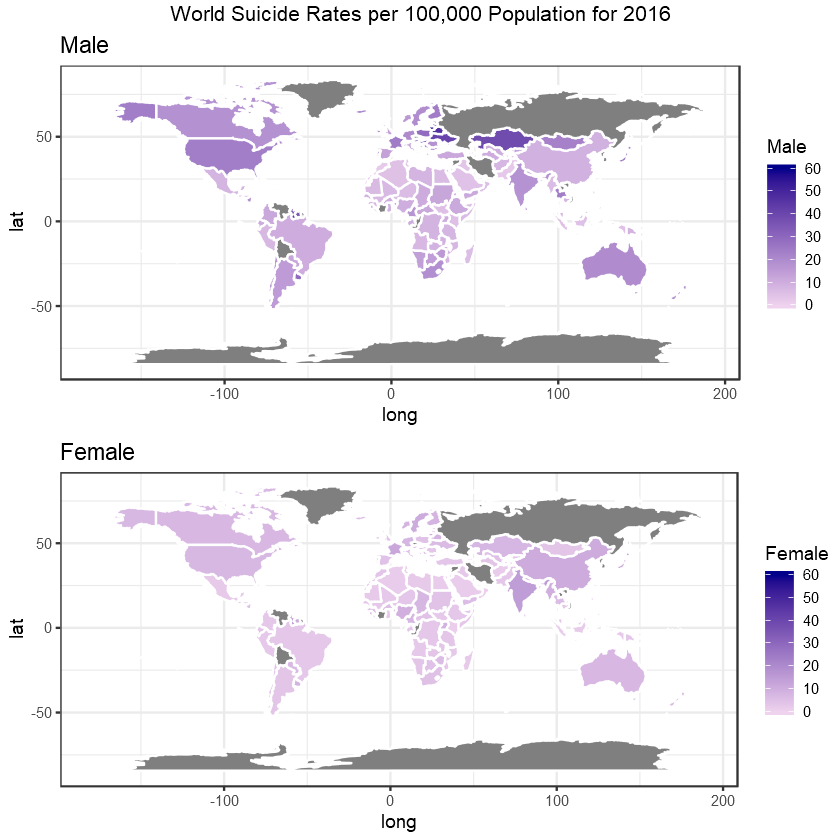

In [31]:
# Arrange both plots to be displayed together horizontally.
grid.arrange(
  male_2016_plot,
  female_2016_plot,
  nrow = 2,
  top = "World Suicide Rates per 100,000 Population for 2016")

From the above plots we can see that, on average, makes have a much higher suicide rate per 100,000 population than females. This can be seen in the darkness of the fill colours for each country. It is particularly alarming that higher income countries, for example in Scandinavia, have higher male suicide rates than females. Despite the amount of funding spend on public health and progress of these countries, suicide rates remain unusually high.

In [33]:
# Convert both year columns from the world happiness and wide suicide statistics
# dataframes to factors to be merged together. 
world_happiness$year <- as.factor(world_happiness$year)
df_wide$year <- as.factor(df_wide$year)

In [34]:
# Join the two dataframes on intersecting (inner) values by both country and year.
suicide_happiness <- inner_join(world_happiness, df_wide, by = c("country" = "Country", "year" = "year"))

Warning message:
"Column `year` joining factors with different levels, coercing to character vector"

In [36]:
# Visualize the final dataframe of the suicide statistics and world happiness report.
suicide_happiness

WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Both sexes,Female,Male
Afghanistan,Afghanistan,2010,4.758381,7.416260,0.5390752,48.15951,0.6001272,0.138528779,0.7067661,0.6182655,0.2753238,5.1,1.4,8.6
Afghanistan,Afghanistan,2015,3.982855,7.506759,0.5285972,49.58854,0.3889276,0.094635032,0.8806383,0.5535532,0.3392760,4.8,1.5,7.8
Afghanistan,Afghanistan,2016,4.220169,7.497288,0.5590718,49.87127,0.5225662,0.057393152,0.7932456,0.5649527,0.3483323,4.7,1.5,7.6
Albania,Albania,2010,5.268937,9.145679,0.7331523,67.66759,0.5689584,-0.171882138,0.7262617,0.6479081,0.3000602,7.8,6.1,9.5
Albania,Albania,2015,4.606651,9.249300,0.6393561,68.53149,0.7038507,-0.081631474,0.8847930,0.6883700,0.3504267,6.0,4.4,7.6
Albania,Albania,2016,4.511101,9.282300,0.6384115,68.69838,0.7298189,-0.017927289,0.9010708,0.6752437,0.3217060,6.3,4.7,7.9
Algeria,Algeria,2010,5.463567,9.464850,NA,63.55349,0.5926958,-0.231347829,0.6180379,NA,NA,3.3,1.8,4.9
Algeria,Algeria,2016,5.388171,9.549138,0.7481497,64.82995,NA,NA,NA,0.6688381,0.3713720,3.2,1.7,4.7
Argentina,Argentina,2010,6.441067,9.729388,0.9267986,66.54597,0.7302582,-0.116923824,0.8546954,0.8461356,0.2109755,8.7,3.3,14.3
Argentina,Argentina,2015,6.697131,NA,0.9264923,67.29191,0.8812237,NA,0.8509062,0.8585445,0.3053549,8.8,3.4,14.5


In [35]:
# Write the suicide statistics and world happiness report dataframe to a CSV.
write.csv(suicide_happiness, file = "suicide_estimates_world_happiness.csv")

In [37]:
# Define a dataframe containing countries in the European Union.
europeanUnion <- data.frame(Country = c("Austria","Belgium","Bulgaria","Croatia","Cyprus",
                   "Czech Rep.","Denmark","Estonia","Finland","France",
                   "Germany","Greece","Hungary","Ireland","Italy","Latvia",
                   "Lithuania","Luxembourg","Malta","Netherlands","Poland",
                   "Portugal","Romania","Slovakia","Slovenia","Spain",
                   "Sweden","United Kingdom"))

In [38]:
# Create a new dataframe by merging the European country names with the world happiness
# and suicide statistics dataframe.
europe <- inner_join(suicide_happiness, europeanUnion, by = c("country" = "Country"))

Warning message:
"Column `country`/`Country` joining character vector and factor, coercing into character vector"

In [44]:
# Load in the data containing suicide statistics per 100,000 population for the 
# years 1950 to 2016 and convert it to a tibble.
suicide_100k <- read_csv("suicide_per_100000_people.csv") %>%
  tbl_df()

Parsed with column specification:
cols(
  .default = col_double(),
  geo = col_character()
)
See spec(...) for full column specifications.


In [45]:
# Print out a head of the suicide rate data.
suicide_100k %>%
  head()

geo,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Albania,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,4.06,5.34,NA,3.08,NA,NA,NA,NA,NA,NA
Antigua and Barbuda,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Argentina,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Armenia,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,1.74,NA,NA,NA,2.39,1.92,1.54,2.02,1.85
Australia,9.11,9.41,10.5,10.8,10.7,10.3,10.8,12.2,12.5,...,9.71,9.96,9.62,9.82,9.73,10.30,10.20,11.20,11.60,NA
Austria,NA,NA,NA,NA,NA,20.6,19.9,21.0,20.8,...,11.80,11.20,11.40,11.40,11.40,10.90,10.70,11.20,10.20,9.75


In [46]:
# Glimpse the suicide rate data.
suicide_100k %>%
  glimpse()

Observations: 104
Variables: 68
$ geo    <chr> "Albania", "Antigua and Barbuda", "Argentina", "Armenia", "A...
$ `1950` <dbl> NA, NA, NA, NA, 9.11, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ `1951` <dbl> NA, NA, NA, NA, 9.41, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ `1952` <dbl> NA, NA, NA, NA, 10.50, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ `1953` <dbl> NA, NA, NA, NA, 10.80, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ `1954` <dbl> NA, NA, NA, NA, 10.7, NA, NA, NA, NA, NA, NA, 11.3, NA, NA, ...
$ `1955` <dbl> NA, NA, NA, NA, 10.30, 20.60, NA, NA, NA, NA, NA, 11.00, NA,...
$ `1956` <dbl> NA, NA, NA, NA, 10.80, 19.90, NA, NA, NA, NA, NA, 12.00, NA,...
$ `1957` <dbl> NA, NA, NA, NA, 12.200, 21.000, NA, NA, NA, NA, NA, 12.000, ...
$ `1958` <dbl> NA, NA, NA, NA, 12.50, 20.80, NA, NA, NA, NA, NA, 12.10, NA,...
$ `1959` <dbl> NA, NA, NA, NA, 11.20, 21.80, NA, NA, NA, NA, NA, 10.80, NA,...
$ `1960` <dbl> NA, NA, NA, NA, 10.80, 20.20, NA, NA, NA, 1.07, NA, 12.10, N...
$ `1961` <dbl> NA, 2

In [47]:
# Filter countries that do not have missing values for the year 1951 and drop the columns 
# 1950 and 2016.
suicide_100k <- suicide_100k %>%
  filter(!is.na(`1951`)) %>%
  select(- c(`1950`, `2016`))

In [48]:
# Drop the following countries as these contain many missing values.
suicide_100k <- suicide_100k %>%
  filter(geo != "Sri Lanka") %>%
  filter(geo != "Trinidad and Tobago")

In [49]:
# Drop all countries that have missing values for the year 2015 excluding New Zealand.
suicide_100k <- suicide_100k %>%
  filter(!is.na(`2015`) | geo == "New Zealand")

In [50]:
# Convert the dataframe into a long format for plotting by grouping the year columns into 
# a single column.
suicide_100k <- suicide_100k %>%
  gather(key = 'year', value = 'value', -'geo')

In [51]:
# Convert the year column to an integer for smooth transforming in the animation.
suicide_100k$year <- as.integer(suicide_100k$year)

In [52]:
# Rename the country column for label consistency.
suicide_100k <- suicide_100k %>%
  rename(Country = geo)

In [53]:
# Write the final suicide statistics for the specific countries between 1951 and 2015 
# dataframe to a CSV.
write.csv(suicide_100k, file = "suicide_estimates_countries_1951_2015.csv")

In [54]:
# Using the gganimate package, plot a bar chart of the suicide rate per 100,000 population
# for the given countries transitioning between the years 1951 to 2015.
plot <- suicide_100k %>%
  ggplot(aes(x = Country, y = value, fill = Country)) + 
  geom_bar(stat = 'identity', color = 'black') +
  theme(axis.text.x = element_text(angle=60, hjust=1, size=10)) +
  labs(title = 'Suicide Rates (1951-2015) Year: {frame_time}', 
       x = 'Country', y = 'Suicide Rate per 100,000 Population') +
  transition_states(year, transition_length = 10, state_length = 10) +
  transition_time(year) +
  ease_aes('linear')

In [57]:
# Animate the plot.
animate(plot)

Warning message:
                                                                              


Frame 100 (100%)
Finalizing encoding... done!


In [56]:
# Save the plot animation as a gif.
anim_save("Suicide_Rates.gif")

We can see that for the countries plotted, Japan and Denmark have the highest total suicide rates per 100,000 population, particularly in the 1950's and 1960's. On average, we see an overall decrease in the total suicide rates for each country aroun the late 1980's and early 1990's. This could suggest that as living conditions and global GDP grew, suicide rates by country decreased. It is also worth noting the Mediterranean countries Italy and Spain have two of the lowest total suicide rates and lowest variance in suicide over the period of the data.